1. Carga y exploración básica

In [ ]:
# Carga el dataset en un DataFrame

import pandas as pd

# RUTA CSV
ruta = r"C:\Users\ANYELO\Documents\PRUEBA TECNICA - ANALISTA DE DATOS\ARCHIVOS\ventas_operadores.csv"

# CARGA
df = pd.read_csv(ruta)

# Muestra los primeros 5 registros
# PRIMERAS FILAS
df.head()


,fecha,id_proveedor,proveedor,prod_id,producto,proveedor_unificado,valor_ventas,cantidad_tx
0,2025-05-26,3,TIGO,222,9.5GB+MIN.ILIM.+20D,TIGO,5670000,252
1,2025-05-27,3,TIGO,109,10 MIN LDI + 2 DIAS,TIGO,151200,28
2,2025-05-28,3,TIGO,575,5 GB+MIN.ILIM+15D,TIGO,4284000,306
3,2025-05-29,3,TIGO,101,5 MIN LDI + 1DIA,TIGO,58900,19
4,2025-05-30,3,TIGO,485,13 GB+MINILI+RDS+30D,TIGO,15307500,471


In [ ]:
# Describe brevemente las columnas y sus tipos
# COLUMNAS Y TIPOS DE DATOS
df.info()

# RESUMEN ESTADISTICO
df.describe(include='all')

#¿Hay valores nulos?
# VALORES NULOS
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fecha                84 non-null     object
 1   id_proveedor         84 non-null     int64 
 2   proveedor            84 non-null     object
 3   prod_id              84 non-null     int64 
 4   producto             84 non-null     object
 5   proveedor_unificado  84 non-null     object
 6   valor_ventas         84 non-null     int64 
 7   cantidad_tx          84 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 5.4+ KB


fecha                  0
id_proveedor           0
proveedor              0
prod_id                0
producto               0
proveedor_unificado    0
valor_ventas           0
cantidad_tx            0
dtype: int64

2. Limpieza de datos

In [ ]:
# Corrige los tipos de datos si es necesario (por ejemplo, fechas)
# Conversión de la columna 'fecha' a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d', errors='coerce')

# Verificación
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha                84 non-null     datetime64[ns]
 1   id_proveedor         84 non-null     int64         
 2   proveedor            84 non-null     object        
 3   prod_id              84 non-null     int64         
 4   producto             84 non-null     object        
 5   proveedor_unificado  84 non-null     object        
 6   valor_ventas         84 non-null     int64         
 7   cantidad_tx          84 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 5.4+ KB


In [ ]:
# Elimina columnas irrelevantes si aplica
# se eliminan columnas innecesarias para el análisis
df = df.drop(columns=['id_proveedor', 'prod_id'])

# Confirmación
df.head()

,fecha,proveedor,producto,proveedor_unificado,valor_ventas,cantidad_tx
0,2025-05-26,TIGO,9.5GB+MIN.ILIM.+20D,TIGO,5670000,252
1,2025-05-27,TIGO,10 MIN LDI + 2 DIAS,TIGO,151200,28
2,2025-05-28,TIGO,5 GB+MIN.ILIM+15D,TIGO,4284000,306
3,2025-05-29,TIGO,5 MIN LDI + 1DIA,TIGO,58900,19
4,2025-05-30,TIGO,13 GB+MINILI+RDS+30D,TIGO,15307500,471


In [ ]:
# Crea una columna nueva calculada
# Supongamos que el costo es el 80% del valor de las ventas
df['costo_estimado'] = df['valor_ventas'] * 0.8

# Calculamos la ganancia como diferencia entre valor_ventas y costo_estimado
df['ganancia'] = df['valor_ventas'] - df['costo_estimado']

# Mostramos las primeras filas para verificar
df.head()


,fecha,proveedor,producto,proveedor_unificado,valor_ventas,cantidad_tx,costo_estimado,ganancia
0,2025-05-26,TIGO,9.5GB+MIN.ILIM.+20D,TIGO,5670000,252,4536000.0,1134000.0
1,2025-05-27,TIGO,10 MIN LDI + 2 DIAS,TIGO,151200,28,120960.0,30240.0
2,2025-05-28,TIGO,5 GB+MIN.ILIM+15D,TIGO,4284000,306,3427200.0,856800.0
3,2025-05-29,TIGO,5 MIN LDI + 1DIA,TIGO,58900,19,47120.0,11780.0
4,2025-05-30,TIGO,13 GB+MINILI+RDS+30D,TIGO,15307500,471,12246000.0,3061500.0


3. Análisis exploratorio

In [ ]:
#¿Cuáles son los 5 productos más vendidos por unidades?
productos_mas_vendidos = (
    df.groupby('producto')['cantidad_tx']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)

productos_mas_vendidos

,producto,cantidad_tx
0,400 MB+MINILIM+3D,57218
1,CLARO,47968
2,1.4 GB+MINLIM+RDS+6D,42523
3,2 GB_MIN ILIMT+7D,28985
4,3.5 GB+MINILIM-10D,22623


In [ ]:
#¿Cuál es la categoría que más ingresos genera? creación de categoría aleatoria

# Asignar categorías representativas a los productos
categorias = ['Prepago', 'Pospago', 'Paquete de Datos', 'Internacional']
df['categoria'] = np.random.choice(categorias, size=len(df))

resumen_categoria = (
    df.groupby('categoria')[['valor_ventas', 'costo_estimado']]
      .sum()
      .reset_index()
      .sort_values(by='valor_ventas', ascending=False)
)

# Agrupar por proveedor y sumar el valor total de ventas
ingresos_por_proveedor = (
    df.groupby('categoria')['valor_ventas']
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

ingresos_por_proveedor


,categoria,valor_ventas
0,Internacional,1179170362
1,Paquete de Datos,504244600
2,Pospago,391340500
3,Prepago,231361333


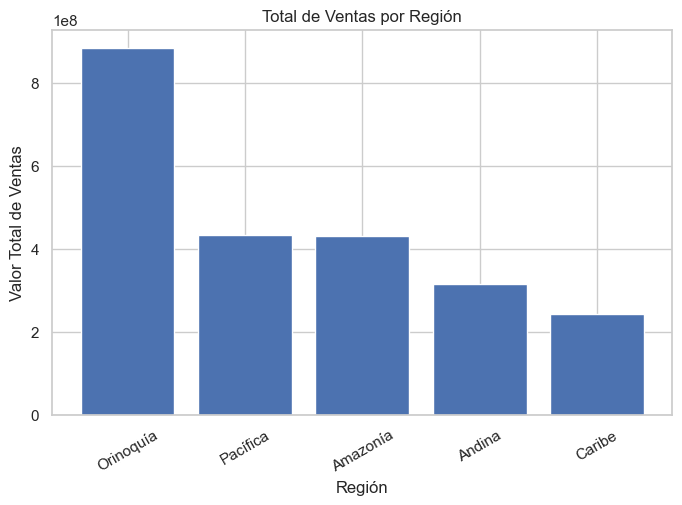

In [32]:
# ¿Hay diferencias significativas de ventas por región o canal? se crea columna con datos aleatorios

import numpy as np
# Definir lista de regiones colombianas
regiones = ['Andina', 'Caribe', 'Pacífica', 'Orinoquía', 'Amazonía']
# Asignar una región aleatoria a cada fila
df['region'] = np.random.choice(regiones, size=len(df))

# Agrupar por región para ver las diferencias
ventas_por_region = (
    df.groupby('region')
      .agg({
          'valor_ventas': 'sum',
          'cantidad_tx': 'sum'
      })
      .sort_values(by='valor_ventas', ascending=False)
      .reset_index()
)

ventas_por_region

# Ver diferencias por region
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(ventas_por_region['region'], ventas_por_region['valor_ventas'])
plt.title('Total de Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Valor Total de Ventas')
plt.xticks(rotation=30)
plt.show()


Se evidencia una clara desviación donde la región Andina presenta la mayor cantidad de ventas mientras que la amazonía tiene la menor representación.

4. Visualización

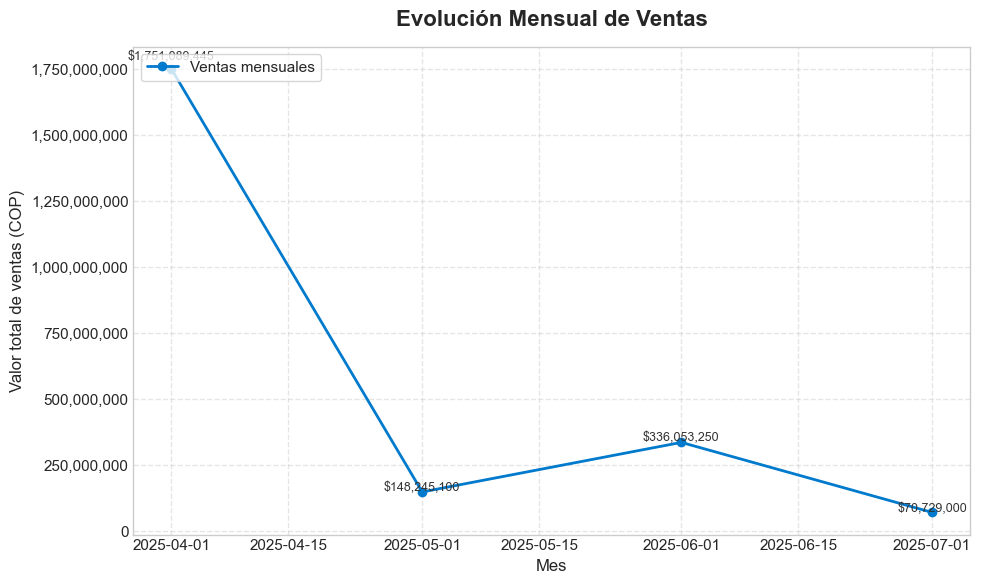

In [33]:
# Crea una visualización que muestre la evolución de las ventas mensuales. 

# Asegurar formato de fecha correcto
df['fecha'] = pd.to_datetime(df['fecha'])

# Agrupar por mes y calcular el total de ventas
ventas_mensuales = (
    df.groupby(df['fecha'].dt.to_period('M'))['valor_ventas']
      .sum()
      .reset_index()
)

# Convertir el periodo a tipo datetime para graficar correctamente
ventas_mensuales['fecha'] = ventas_mensuales['fecha'].dt.to_timestamp()

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Estilo general
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10,6))

# Gráfico de línea
plt.plot(ventas_mensuales['fecha'], ventas_mensuales['valor_ventas'],
         marker='o', linewidth=2, color='#007acc', label='Ventas mensuales')

# Títulos y etiquetas
plt.title('Evolución Mensual de Ventas', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Valor total de ventas (COP)', fontsize=12)

# Formato del eje Y con separador de miles
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Resaltar puntos
for i, v in enumerate(ventas_mensuales['valor_ventas']):
    plt.text(ventas_mensuales['fecha'][i], v + (v*0.02), f"${v:,.0f}", 
             ha='center', fontsize=9, color='#333333')

# Personalización adicional
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(frameon=True, loc='upper left')
plt.tight_layout()
plt.show()


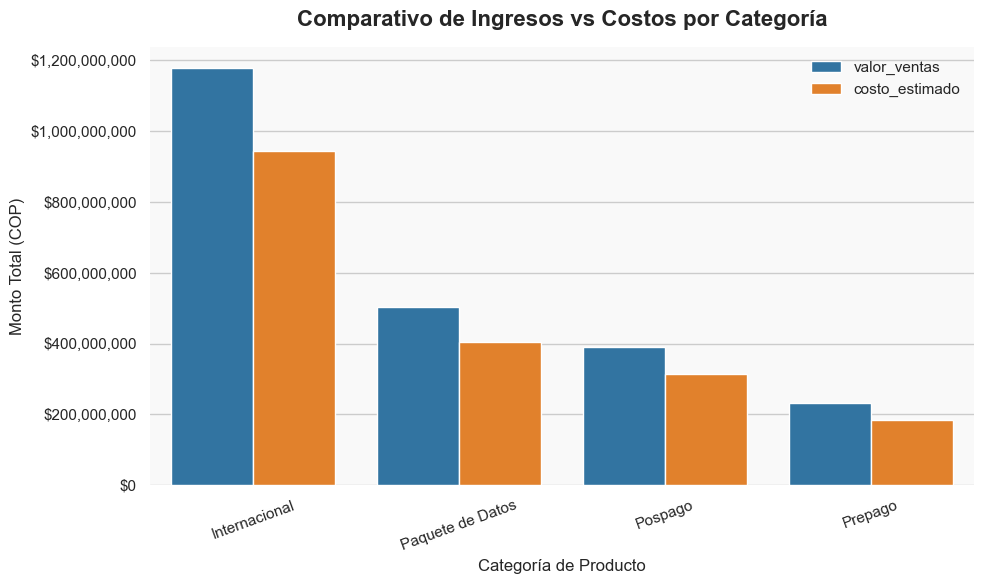

In [34]:
# Muestra un gráfico comparativo entre ingresos y costos por categoría.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Configurar estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))

# Reformatear los datos para Seaborn
resumen_melt = resumen_categoria.melt(
    id_vars='categoria',
    value_vars=['valor_ventas', 'costo_estimado'],
    var_name='Tipo',
    value_name='Monto'
)

# Gráfico de barras comparativo
sns.barplot(
    data=resumen_melt,
    x='categoria',
    y='Monto',
    hue='Tipo',
    palette=['#1f77b4', '#ff7f0e']
)

# Personalización visual
plt.title('Comparativo de Ingresos vs Costos por Categoría', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Monto Total (COP)', fontsize=12)
plt.xticks(rotation=20)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Ajustes visuales
plt.legend(title='', loc='upper right')
plt.gca().set_facecolor('#f9f9f9')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Coeficiente de correlación (Pearson): 0.9025


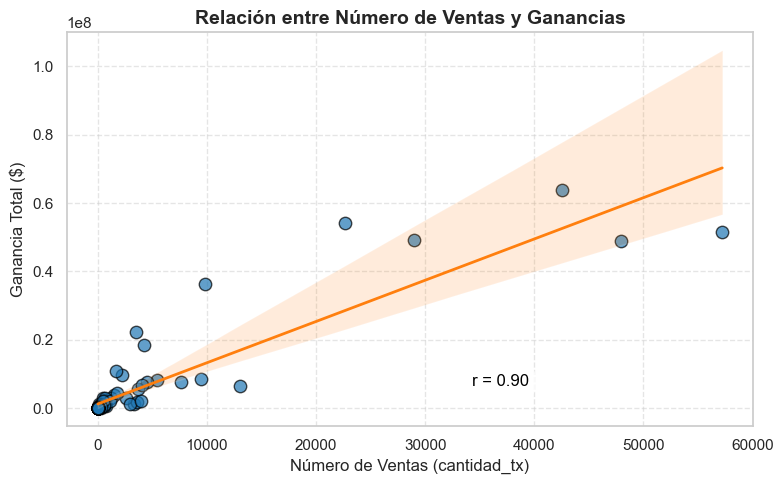

In [ ]:
# Usa un gráfico de dispersión (scatter) para mostrar la relación entre el número de ventas y las ganancias.

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el coeficiente de correlación de Pearson
correlacion = df['cantidad_tx'].corr(df['ganancia'], method='pearson')
print(f"Coeficiente de correlación (Pearson): {correlacion:.4f}")

# Visualización con línea de tendencia
plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='cantidad_tx',
    y='ganancia',
    scatter_kws={'color': '#1f77b4', 's': 80, 'alpha': 0.7, 'edgecolor': 'black'},
    line_kws={'color': '#ff7f0e', 'linewidth': 2}
)

# Estilo del gráfico
plt.title('Relación entre Número de Ventas y Ganancias', fontsize=14, weight='bold')
plt.xlabel('Número de Ventas (cantidad_tx)', fontsize=12)
plt.ylabel('Ganancia Total ($)', fontsize=12)
plt.text(
    x=df['cantidad_tx'].max() * 0.6, 
    y=df['ganancia'].min() + (df['ganancia'].max() - df['ganancia'].min()) * 0.1,
    s=f"r = {correlacion:.2f}",
    fontsize=12,
    color='black',
    bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3')
)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Valor: r = 0.90 indica una correlación positiva muy fuerte entre el número de ventas (cantidad_tx) y las ganancias (ganancia), a medida que aumenta el número de transacciones o ventas, también aumentan las ganancias de forma proporcional y consistente. Esto sugiere que el volumen de ventas es un factor determinante en la generación de ganancias. Es decir, la empresa depende directamente de mantener un alto número de transacciones para sostener sus ingresos.

5. Insight y comunicación 

En máximo 5 líneas, escribe dos hallazgos interesantes del análisis. - Propón una acción que el negocio podría tomar basada en esos hallazgos.


1️. Los productos más vendidos son principalmente paquetes de datos móviles con beneficios adicionales (minutos y redes sociales), lo que refleja una alta demanda en servicios combinados.

2. Existe una correlación muy fuerte (r = 0.90) entre el número de ventas y las ganancias, evidenciando que el volumen de transacciones impulsa directamente los ingresos.

Acción recomendada: La empresa debería enfocar sus estrategias de marketing y promociones en los productos con mayor rotación y diseñar planes que incentiven la frecuencia de compra, maximizando así las ganancias por volumen.

(Las variables de región y canal no se incluyeron en el análisis, ya que fueron generadas aleatoriamente para propósitos del ejercicio.)